# K-MEans

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

In [2]:
nro_registros = 300
nro_features = 2
nro_clusters = 4

x1, x2 = make_blobs(n_samples=nro_registros, n_features=nro_features, centers=nro_clusters, random_state=15)

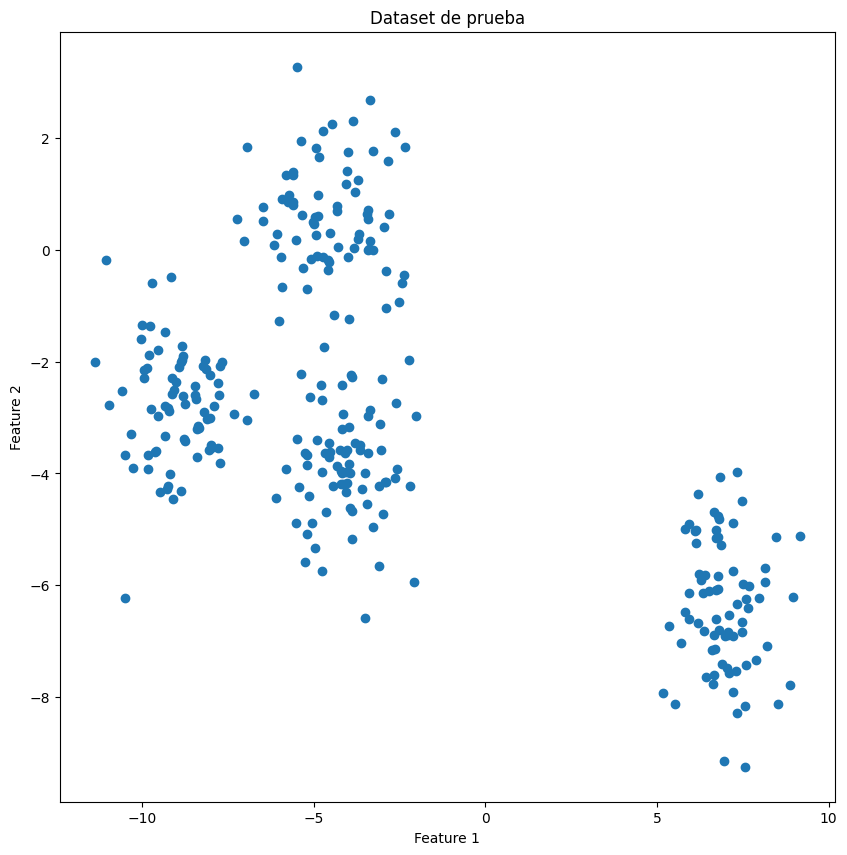

In [3]:
plt.figure(figsize=(10, 10))
plt.scatter(x1[:, 0], x1[:, 1])
plt.title("Dataset de prueba")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
modelo_kmeans = KMeans(n_clusters=nro_clusters, random_state=42)
modelo_kmeans.fit(x1)

KMeans(n_clusters=4, random_state=42)

In [5]:
predicciones = modelo_kmeans.predict(x1)
predicciones

array([2, 2, 3, 3, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 3, 3, 2, 1, 2, 0, 1, 1,
       1, 2, 3, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 3, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 2, 1, 3, 3, 1, 2,
       2, 0, 3, 3, 1, 2, 2, 1, 0, 1, 2, 2, 3, 1, 3, 1, 3, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 3, 2, 2, 3, 3, 1, 3, 2, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 1, 3, 1, 2, 3, 0, 2, 1, 1, 3, 2,
       1, 3, 3, 1, 2, 1, 1, 2, 3, 2, 2, 0, 0, 3, 1, 2, 1, 2, 1, 0, 0, 0,
       2, 2, 3, 3, 1, 2, 1, 0, 3, 1, 0, 1, 3, 2, 0, 3, 1, 1, 3, 3, 1, 3,
       2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 2, 3, 3, 2, 1, 0, 2, 3,
       2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 1, 3, 3, 0, 2, 3, 2, 0, 3, 1, 0,
       2, 3, 3, 0, 0, 2, 1, 3, 0, 3, 3, 0, 0, 1, 3, 0, 0, 3, 1, 1, 1, 2,
       0, 0, 0, 3, 1, 0, 1, 2, 1, 1, 1, 1, 0, 3, 0, 2, 3, 2, 1, 1, 1, 0,
       2, 1, 0, 0, 2, 3, 3, 2, 2, 0, 1, 0, 2, 3, 3, 0, 1, 2, 1, 3, 2, 1,
       0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0], d

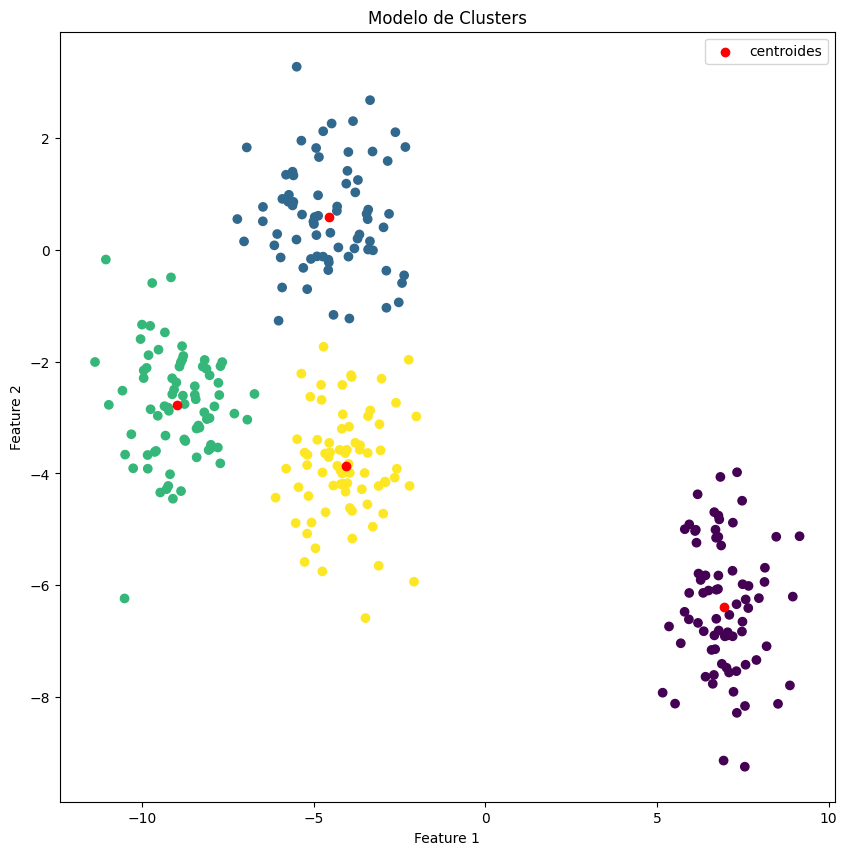

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(x1[:,0], x1[:,1], c=predicciones)
plt.scatter(modelo_kmeans.cluster_centers_[:,0], modelo_kmeans.cluster_centers_[:,1], color='red', label='centroides')
plt.title("Modelo de Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [7]:
wcss = []
for i in range(1, 11):
    modelo_kmeans = KMeans(n_clusters=i, random_state=42)
    modelo_kmeans.fit(x1)
    wcss.append(modelo_kmeans.inertia_)

In [8]:
wcss

[12825.497514630873,
 2511.0098575043185,
 1350.1547899413347,
 600.6043280097722,
 525.021482216537,
 481.801805049498,
 436.4335449296934,
 366.189193977414,
 335.15429600329946,
 311.93494762815635]

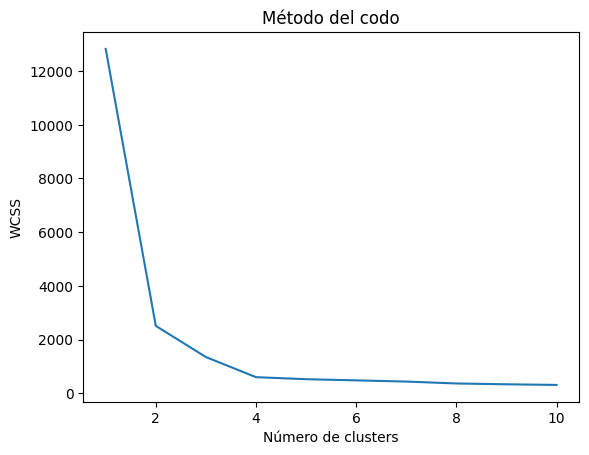

In [9]:
plt.plot(range(1, 11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("WCSS")
plt.show()

# Overfitting vs Underfitting

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [30]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

y_pred = modelo.predict(X_prueba)

accuracy = accuracy_score(y_prueba, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.825


In [31]:
y_predicciones_entrenamiento = modelo.predict(X_entrenamiento)
y_predicciones_prueba = modelo.predict(X_prueba)

In [33]:
score_entreamiento = accuracy_score(y_entrenamiento, y_predicciones_entrenamiento)
score_prueba = accuracy_score(y_prueba, y_predicciones_prueba)
print("Precisión de entrenamiento:", score_entreamiento)
print("Precisión de prueba:", score_prueba)

Precisión de entrenamiento: 0.815
Precisión de prueba: 0.825


In [34]:
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
cv_score = cross_val_score(modelo, X, y, cv=kfold)
print(cv_score)
print(cv_score.mean())

[0.82035928 0.78378378 0.81381381]
0.8059856263449078


# Metricas de Evaluación

In [15]:
# Librerías
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import numpy as np

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/AnshTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [17]:
data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].median(), inplace=True)
data['gdp_per_capita'].fillna(data['gdp_per_capita'].median(), inplace=True)

data['Access to clean fuels for cooking'].fillna(data['Access to clean fuels for cooking'].median(), inplace=True)
data['Primary energy consumption per capita (kWh/person)'].fillna(data['Primary energy consumption per capita (kWh/person)'].median(), inplace=True)

/tmp/ipykernel_6226/2080841128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].median(), inplace=True)
/tmp/ipykernel_6226/2080841128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [18]:
X = data[['gdp_per_capita', 'Primary energy consumption per capita (kWh/person)', 'Access to clean fuels for cooking']]
y = data['Access to electricity (% of population)']

In [24]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

y_predicciones = modelo.predict(X_prueba)

# rmse
rmse = np.sqrt(mean_squared_error(y_prueba, y_predicciones))
print("RMSE:", rmse)
# mse
mae = mean_absolute_error(y_prueba, y_predicciones)
print("MAE:", mae)

# r2 ajuste
r2 = modelo.score(X_prueba, y_prueba)
print("R2:", r2)


RMSE: 15.310520333904957
MAE: 10.630381375967291
R2: 0.7414159812077545


In [25]:
n_datos_entrenamiento = len(y_entrenamiento)
n_datos_prueba = len(y_prueba)
k = X.shape[1]


In [27]:
r2_ajustado1 = 1 - ((1 - r2) * (n_datos_prueba - 1) / (n_datos_prueba - k - 1))
print("R2 ajustado:", r2_ajustado1)

R2 ajustado: 0.7403474522044808


In [29]:
r2_ajustado2 = 1 - ((1 - r2) * (n_datos_entrenamiento - 1) / (n_datos_entrenamiento - k - 1))
print("R2 ajustado:", r2_ajustado2)

R2 ajustado: 0.7411498570031656


In [20]:
data['Access to electricity (% of population)'].describe()

,Access to electricity (% of population)
count,3649.000000
mean,78.986944
std,30.251076
min,1.252269
25%,59.952995
50%,98.361570
75%,100.000000
max,100.000000
